<a href="https://colab.research.google.com/github/KatherineElkins/networkx_miniproject_3_programming-humanity_2025/blob/main/IPHS200_Network_Analysis_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Analysis of the Barbie Screenplay

This notebook analyzes character relationships in two complementary ways:

**Co-Presence Network (G):** Undirected — A shares scene with B. Measures physical proximity.

**Dialogue Network (G_dialogue):** Directed — A speaks to B. Measures communication flow.

---
# Setup and Data Loading

In [ ]:
!pip install networkx pandas matplotlib python-louvain -q

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import community.community_louvain as community_louvain
import numpy as np
import io

print("Libraries loaded successfully.")

Libraries loaded successfully.


## Load Your Data

Replace the data below with your own CSV content. Keep the same format:
- **Co-Presence:** `Source,Target,Weight` (undirected, Weight = shared scenes)
- **Dialogue:** `Source,Target,Weight` (directed, Source speaks TO Target)

In [ ]:
# ==============================================================================
# CO-PRESENCE DATA (undirected: A shares scene with B)
# ==============================================================================
copresence_data = """Source,Target,Weight
Barbie Margot,Ken Ryan Gosling,20
Barbie Margot,Gloria,12
Barbie Margot,Sasha,11
Barbie Margot,Weird Barbie,9
Barbie Margot,Ken Simu Liu,8
Barbie Margot,Mattel CEO,6
Barbie Margot,President Barbie,5
Barbie Margot,Allan,4
Barbie Margot,Ruth,3
Ken Ryan Gosling,Ken Simu Liu,10
Ken Ryan Gosling,President Barbie,7
Ken Ryan Gosling,Doctor Barbie,6
Ken Ryan Gosling,Physicist Barbie,6
Ken Ryan Gosling,Ken Kingsley,5
Ken Ryan Gosling,Gloria,4
Ken Ryan Gosling,Sasha,4
Ken Ryan Gosling,Mattel CEO,4
Ken Ryan Gosling,Weird Barbie,2
Gloria,Sasha,8
Gloria,Mattel CEO,5
Gloria,Weird Barbie,3
Gloria,Nerdy Well Meaning Dad,3
Sasha,Nerdy Well Meaning Dad,3
Mattel CEO,Aaron (Mattel Employee),4
Mattel CEO,Other Board Members,3
President Barbie,Doctor Barbie,5
President Barbie,Physicist Barbie,5
President Barbie,Judge Barbie,5
Doctor Barbie,Physicist Barbie,4
Doctor Barbie,Judge Barbie,4
Physicist Barbie,Judge Barbie,4
Ken Simu Liu,Ken Kingsley,4
Ken Simu Liu,Ken Ncuti,4
Ken Simu Liu,Ken Scott,4
Allan,Skipper,3
Allan,Midge,2
Allan,Weird Barbie,4
Skipper,Midge,2
Midge,Allan,1
Judge Barbie,Journalist Barbie,2
"""

# ==============================================================================
# DIALOGUE DATA (directed: Source speaks TO Target)
# ==============================================================================
dialogue_data = """Source,Target,Weight
Barbie Margot,Ken Ryan Gosling,35
Barbie Margot,Gloria,25
Barbie Margot,Sasha,15
Barbie Margot,Weird Barbie,12
Barbie Margot,Mattel CEO,8
Barbie Margot,Ruth,6
Barbie Margot,President Barbie,5
Barbie Margot,Allan,4
Ken Ryan Gosling,Barbie Margot,40
Ken Ryan Gosling,Ken Simu Liu,12
Ken Ryan Gosling,Mattel CEO,3
Ken Ryan Gosling,Ken Ncuti,3
Ken Ryan Gosling,Ken Kingsley,3
Gloria,Barbie Margot,30
Gloria,Sasha,10
Gloria,Nerdy Well Meaning Dad,5
Gloria,Mattel CEO,4
Sasha,Barbie Margot,10
Sasha,Gloria,5
Sasha,Nerdy Well Meaning Dad,3
Weird Barbie,Barbie Margot,15
Weird Barbie,Allan,5
Mattel CEO,Barbie Margot,10
Mattel CEO,Gloria,5
Mattel CEO,Aaron (Mattel Employee),4
President Barbie,Ken Ryan Gosling,5
President Barbie,Doctor Barbie,3
President Barbie,Judge Barbie,3
Ruth,Barbie Margot,10
Allan,Weird Barbie,4
Allan,Gloria,3
Ken Simu Liu,Ken Ryan Gosling,10
Ken Simu Liu,Ken Ncuti,4
Doctor Barbie,President Barbie,3
Physicist Barbie,President Barbie,2
Judge Barbie,President Barbie,2
Skipper,Allan,1
Midge,Skipper,1
"""

# Parse data
df_copresence = pd.read_csv(io.StringIO(copresence_data))
df_dialogue = pd.read_csv(io.StringIO(dialogue_data))

# Create graphs
G = nx.from_pandas_edgelist(df_copresence, 'Source', 'Target', edge_attr='Weight')
G_dialogue = nx.from_pandas_edgelist(df_dialogue, 'Source', 'Target', edge_attr='Weight', create_using=nx.DiGraph())

print(f"Co-Presence Graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Dialogue Graph: {G_dialogue.number_of_nodes()} nodes, {G_dialogue.number_of_edges()} directed edges")

Co-Presence Graph: 22 nodes, 39 edges
Dialogue Graph: 19 nodes, 38 directed edges


---
# Session 1: Co-Presence Network

Analyzing who shares scenes with whom. Key metrics: $\text{Strength}$ (total shared screentime) and $\text{Betweenness}$ (bridging ability).

## 1.1 Co-Presence Centrality and Global Metrics

In [ ]:
# === Centrality Calculations ===
strength = dict(G.degree(weight='Weight'))
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G, weight='Weight', max_iter=1000)

co_presence_df = pd.DataFrame({
    'Character': list(G.nodes()),
    'Strength': [strength[n] for n in G.nodes()],
    'Betweenness': [betweenness[n] for n in G.nodes()],
    'Closeness': [closeness[n] for n in G.nodes()],
    'Eigenvector': [eigenvector[n] for n in G.nodes()]
}).sort_values('Strength', ascending=False)

# === Global Metrics ===
transitivity = nx.transitivity(G)
try:
    avg_path = nx.average_shortest_path_length(G)
except:
    avg_path = float('inf')

print("=" * 60)
print("CO-PRESENCE CENTRALITY TABLE")
print("=" * 60)
pd.set_option('display.float_format', '{:.3f}'.format)
print(co_presence_df.to_string(index=False))

print("\n" + "=" * 60)
print("GLOBAL METRICS")
print("=" * 60)
print(f"Transitivity (clustering): {transitivity:.3f}")
print(f"Average Path Length: {avg_path:.3f}")

CO-PRESENCE CENTRALITY TABLE
              Character  Strength  Betweenness  Closeness  Eigenvector
          Barbie Margot        78        0.399      0.618        0.580
       Ken Ryan Gosling        68        0.352      0.600        0.517
                 Gloria        35        0.068      0.488        0.317
           Ken Simu Liu        30        0.195      0.467        0.257
       President Barbie        27        0.121      0.477        0.196
                  Sasha        26        0.033      0.447        0.275
             Mattel CEO        22        0.186      0.477        0.179
       Physicist Barbie        19        0.030      0.429        0.118
          Doctor Barbie        19        0.030      0.429        0.118
           Weird Barbie        18        0.033      0.467        0.186
           Judge Barbie        15        0.095      0.350        0.048
                  Allan        12        0.181      0.429        0.076
           Ken Kingsley         9        0.000  

### Interpretation of 1.1

$\text{Barbie Margot}$ and $\text{Ken Ryan Gosling}$ dominate Strength, confirming the two-protagonist structure. High Betweenness for $\text{Barbie Margot}$ indicates she bridges otherwise separate communities.

---
📊 **ANALYSIS QUESTION 1: Global Metrics**

What do your Transitivity and Average Path Length values reveal about your network's structure? Is it tightly clustered or sparse? Compact or spread out?

---
📊 **ANALYSIS QUESTION 2: Top Characters**

Who are the top 3 characters in each metric (Strength, Betweenness, Closeness, Eigenvector)? What does each ranking reveal about their narrative role?

---
📊 **ANALYSIS QUESTION 3: Metric Divergences**

Find 2+ characters who rank HIGH in one metric but LOW in another. What does this divergence reveal about their structural role?

## 1.2 Visualization 1: Community Detection

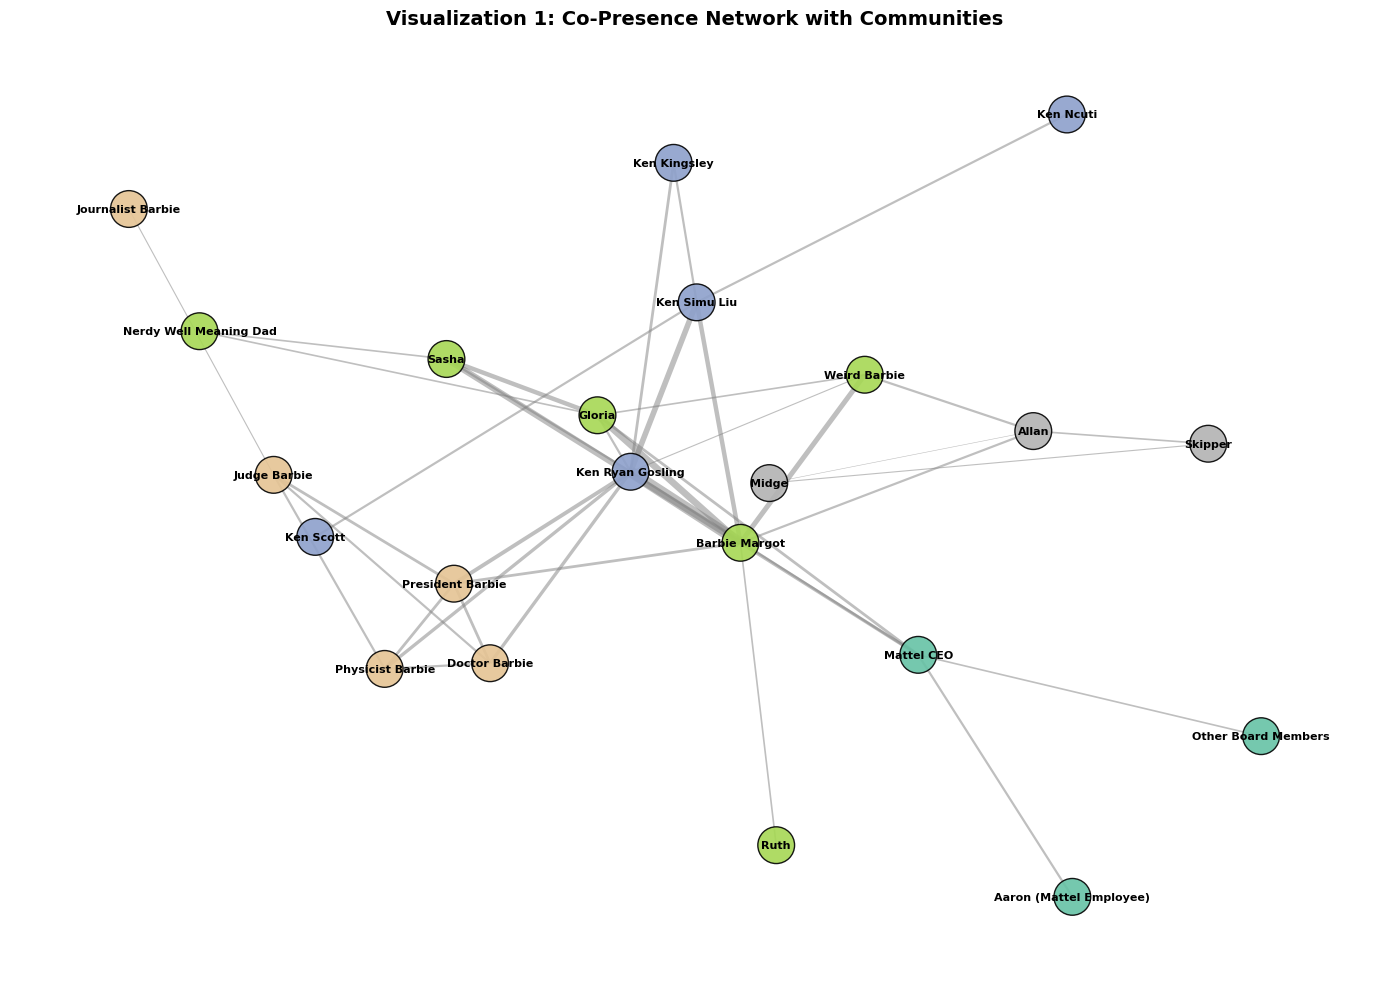


Detected Communities:
  Community 0: Mattel CEO, Aaron (Mattel Employee), Other Board Members
  Community 1: Ken Ryan Gosling, Ken Simu Liu, Ken Kingsley, Ken Ncuti, Ken Scott
  Community 2: Barbie Margot, Gloria, Sasha, Weird Barbie, Ruth, Nerdy Well Meaning Dad
  Community 3: President Barbie, Doctor Barbie, Physicist Barbie, Judge Barbie, Journalist Barbie
  Community 4: Allan, Skipper, Midge


In [ ]:
# === Community Detection ===
partition = community_louvain.best_partition(G, weight='Weight', random_state=42)
num_communities = max(partition.values()) + 1
cmap = plt.get_cmap('Set2', num_communities)
node_colors = [cmap(partition[n]) for n in G.nodes()]

# === Visualization ===
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.8, seed=42)
edge_weights = [G[u][v]['Weight'] * 0.4 for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, alpha=0.9, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title("Visualization 1: Co-Presence Network with Communities", fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Print communities
print("\nDetected Communities:")
communities = {}
for node, comm in partition.items():
    communities.setdefault(comm, []).append(node)
for cid, members in sorted(communities.items()):
    print(f"  Community {cid}: {', '.join(members)}")

### Interpretation of Visualization 1

Colors reveal structural isolation: the $\text{Kens}$, the $\text{Barbieland}$ professionals, and the $\text{Real World}$ figures form distinct clusters. $\text{Barbie Margot}$ links different-colored groups, confirming her bridging role.

---
📊 **ANALYSIS QUESTION 4: Community Interpretation**

List each community and explain what unites its members. Which characters bridge between communities?

---
📊 **ANALYSIS QUESTION 5: Network Topology**

What is the overall SHAPE of your network? (Star/hub-spoke, barbell, core-periphery, small-world, linear chain, complete/dense?) Cite visual evidence and metrics.

## 1.3 Visualization 2: Filtered Network (Core Relationships)

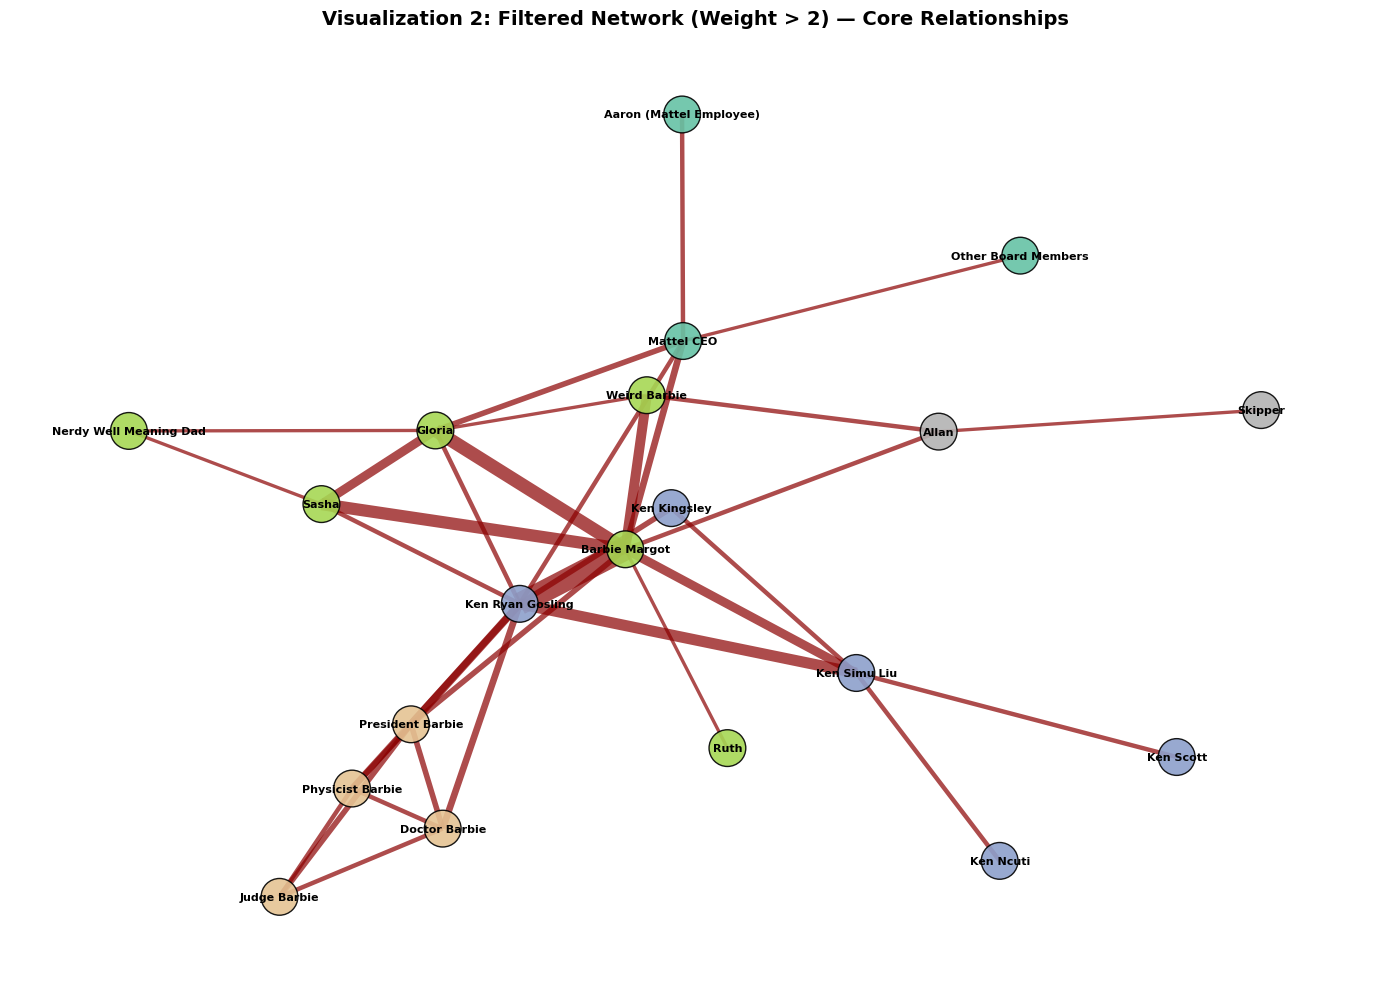


Filtered: 20 nodes, 35 edges
Removed 2 peripheral characters


In [ ]:
# Filter to Weight > 2
G_filtered = nx.Graph()
for u, v, d in G.edges(data=True):
    if d['Weight'] > 2:
        G_filtered.add_edge(u, v, **d)

# Visualization
plt.figure(figsize=(14, 10))
pos_f = nx.spring_layout(G_filtered, k=0.7, seed=42)
filtered_colors = [cmap(partition.get(n, 0)) for n in G_filtered.nodes()]
filtered_weights = [G_filtered[u][v]['Weight'] * 0.8 for u, v in G_filtered.edges()]

nx.draw_networkx_nodes(G_filtered, pos_f, node_size=700, node_color=filtered_colors, alpha=0.9, edgecolors='black')
nx.draw_networkx_edges(G_filtered, pos_f, width=filtered_weights, alpha=0.7, edge_color='darkred')
nx.draw_networkx_labels(G_filtered, pos_f, font_size=8, font_weight='bold')

plt.title("Visualization 2: Filtered Network (Weight > 2) — Core Relationships", fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\nFiltered: {G_filtered.number_of_nodes()} nodes, {G_filtered.number_of_edges()} edges")
print(f"Removed {G.number_of_nodes() - G_filtered.number_of_nodes()} peripheral characters")

### Interpretation of Visualization 2

Removing weak connections reveals the narrative backbone. The persistence of the $\text{Barbie Margot}$–$\text{Ken Ryan Gosling}$ axis confirms the screenplay's two-protagonist commitment.

---
📊 **ANALYSIS QUESTION 6: Narrative Backbone**

Which characters/connections disappeared? What does this reveal about core vs. peripheral relationships? What are the thickest remaining edges?

## 1.4 Visualization 3: Betweenness Centrality (Node Size)

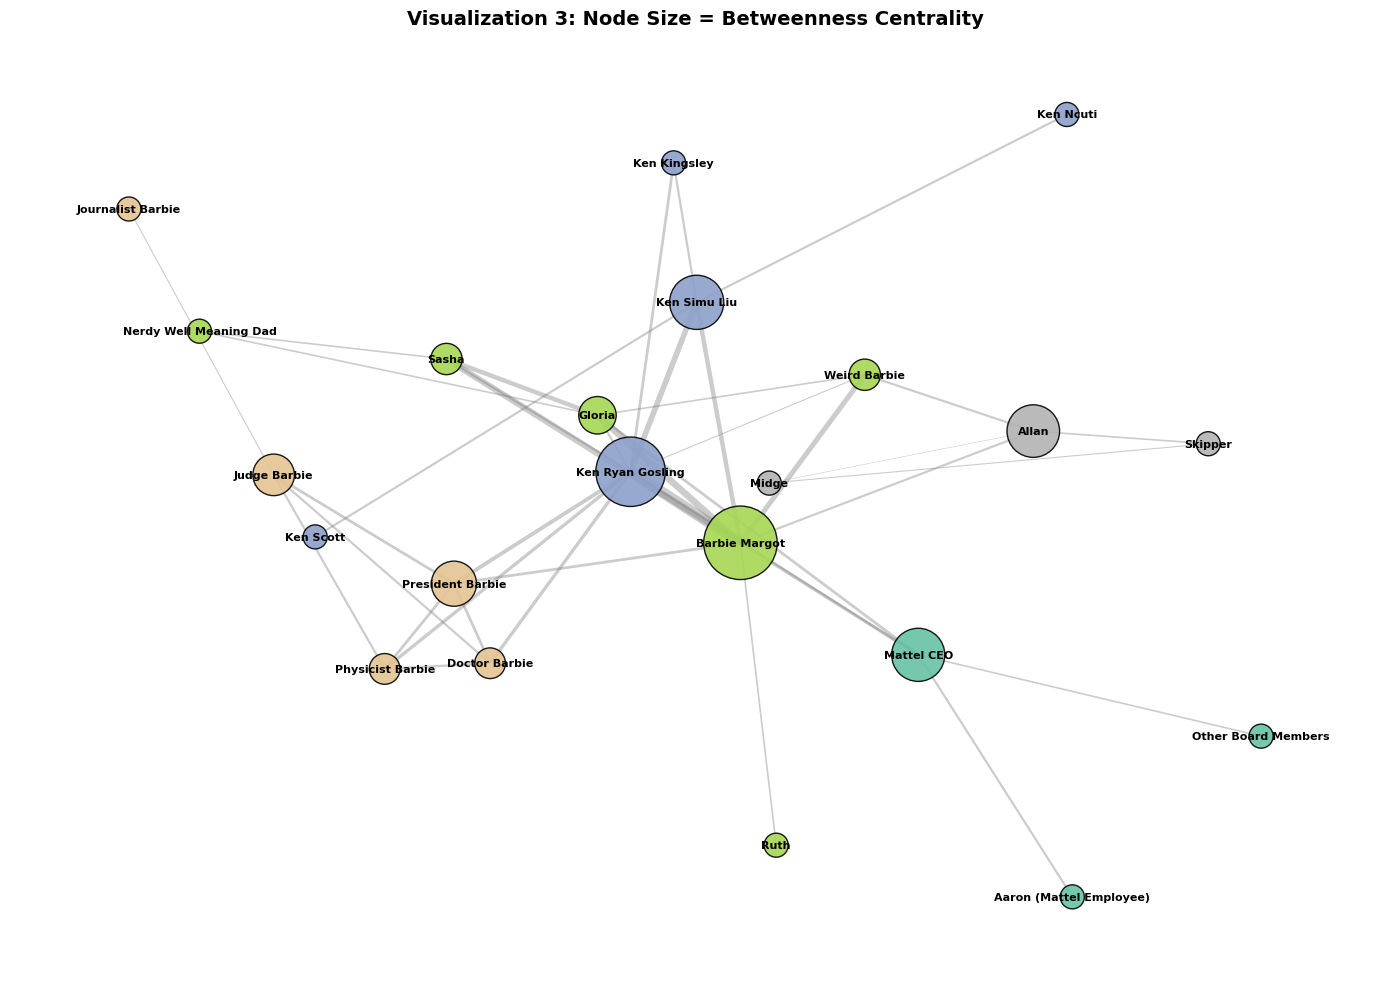

In [ ]:
# Node sizes from betweenness
max_b = max(betweenness.values()) if max(betweenness.values()) > 0 else 1
node_sizes = [300 + (betweenness[n] / max_b) * 2500 for n in G.nodes()]

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.4, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title("Visualization 3: Node Size = Betweenness Centrality", fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### Interpretation of Visualization 3

Larger nodes are structural bridges. $\text{Weird Barbie}$ and $\text{Gloria}$ are essential for the film's transition from $\text{Barbieland}$ to the $\text{Real World}$.

---
📊 **ANALYSIS QUESTION 7: Bridge Characters**

Which characters have the largest nodes? What communities do they connect? How does their position enable plot progression?

---
# Session 2: Dialogue Network

Analyzing who speaks to whom. Key metrics: $\text{In-Degree}$ (spoken to), $\text{Out-Degree}$ (speaks to others), $\text{Eigenvector}$ (connected to influential speakers).

## 2.1 Dialogue Centrality Metrics

In [ ]:
# === Dialogue Centrality ===
in_deg = dict(G_dialogue.in_degree(weight='Weight'))
out_deg = dict(G_dialogue.out_degree(weight='Weight'))
try:
    eig_d = nx.eigenvector_centrality(G_dialogue, weight='Weight', max_iter=1000)
except:
    eig_d = {n: 0 for n in G_dialogue.nodes()}

dialogue_df = pd.DataFrame({
    'Character': list(G_dialogue.nodes()),
    'In-Degree': [in_deg[n] for n in G_dialogue.nodes()],
    'Out-Degree': [out_deg[n] for n in G_dialogue.nodes()],
    'Eigenvector': [eig_d[n] for n in G_dialogue.nodes()]
})
dialogue_df['In/Out Ratio'] = dialogue_df.apply(
    lambda r: r['In-Degree']/r['Out-Degree'] if r['Out-Degree'] > 0 else float('inf'), axis=1)
dialogue_df = dialogue_df.sort_values('In-Degree', ascending=False)

print("=" * 60)
print("DIALOGUE CENTRALITY TABLE")
print("=" * 60)
print(dialogue_df.to_string(index=False))

DIALOGUE CENTRALITY TABLE
              Character  In-Degree  Out-Degree  Eigenvector  In/Out Ratio
          Barbie Margot        115         110        0.697         1.045
       Ken Ryan Gosling         50          61        0.479         0.820
                 Gloria         38          49        0.366         0.776
                  Sasha         25          18        0.262         1.389
           Weird Barbie         16          20        0.160         0.800
             Mattel CEO         15          19        0.158         0.789
       President Barbie         12          11        0.065         1.091
           Ken Simu Liu         12          14        0.107         0.857
                  Allan         10           7        0.067         1.429
 Nerdy Well Meaning Dad          8           0        0.049           inf
              Ken Ncuti          7           0        0.035           inf
                   Ruth          6          10        0.078         0.600
Aaron (Matte

### Interpretation of 2.1

**In-Degree:** $\text{Barbie Margot}$ receives the most attention—she's spoken TO. **Out-Degree:** $\text{Ken Ryan Gosling}$'s high Out vs. lower In reflects his unreciprocated desire. **Eigenvector:** $\text{Ruth}$'s influence comes from speaking to the protagonist, not from popularity.

---
📊 **ANALYSIS QUESTION 8: Dialogue Patterns**

Identify: (a) The dialogue HUB (highest In-Degree), (b) The dialogue DRIVER (highest Out-Degree), (c) Any character with balanced In/Out, (d) High Eigenvector but low degree.

## 2.2 Visualization 4: Directed Dialogue Network

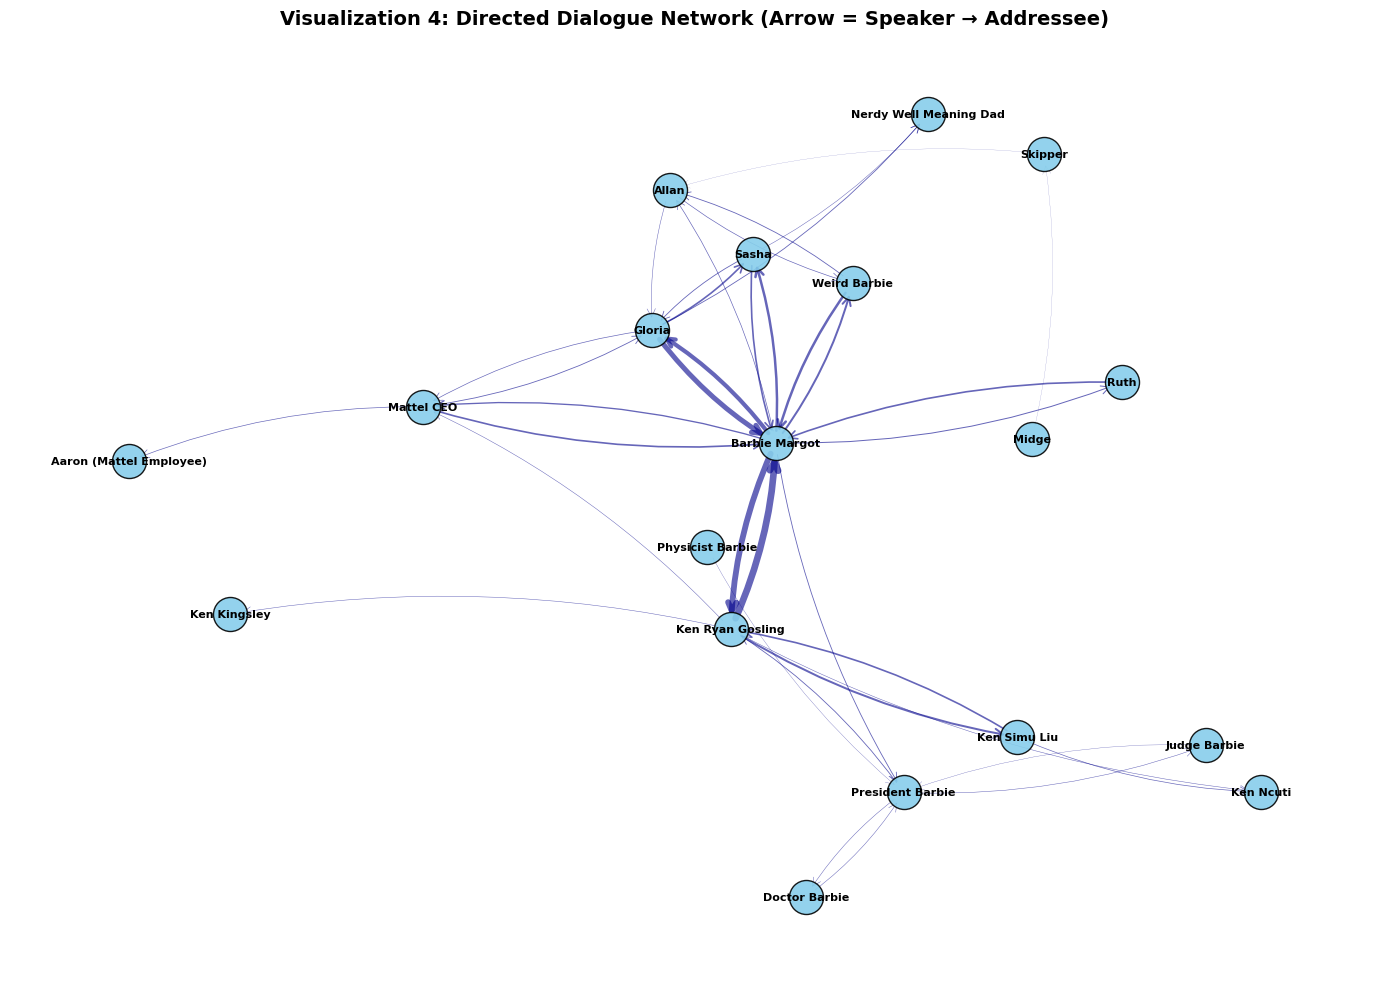

In [ ]:
plt.figure(figsize=(14, 10))
pos_d = nx.spring_layout(G_dialogue, k=0.7, seed=42)
d_weights = [G_dialogue[u][v]['Weight'] * 0.12 for u, v in G_dialogue.edges()]

nx.draw_networkx_nodes(G_dialogue, pos_d, node_size=600, node_color='skyblue', alpha=0.9, edgecolors='black')
nx.draw_networkx_edges(G_dialogue, pos_d, width=d_weights, alpha=0.6, edge_color='darkblue',
                       arrowstyle='->', arrowsize=15, connectionstyle='arc3,rad=0.1')
nx.draw_networkx_labels(G_dialogue, pos_d, font_size=8, font_weight='bold')

plt.title("Visualization 4: Directed Dialogue Network (Arrow = Speaker → Addressee)", fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### Interpretation of Visualization 4

Arrows pointing TO $\text{Barbie Margot}$ from $\text{Gloria}$, $\text{Weird Barbie}$, and $\text{Ruth}$ confirm she is the object of attention and recipient of key explanations.

---
📊 **ANALYSIS QUESTION 9: Arrow Patterns**

Find: (a) A character with many INCOMING arrows (spoken to often), (b) A character with many OUTGOING arrows (speaks often), (c) An asymmetric/unreciprocated relationship.

## 2.3 Visualization 5: In-Degree vs Out-Degree Scatter

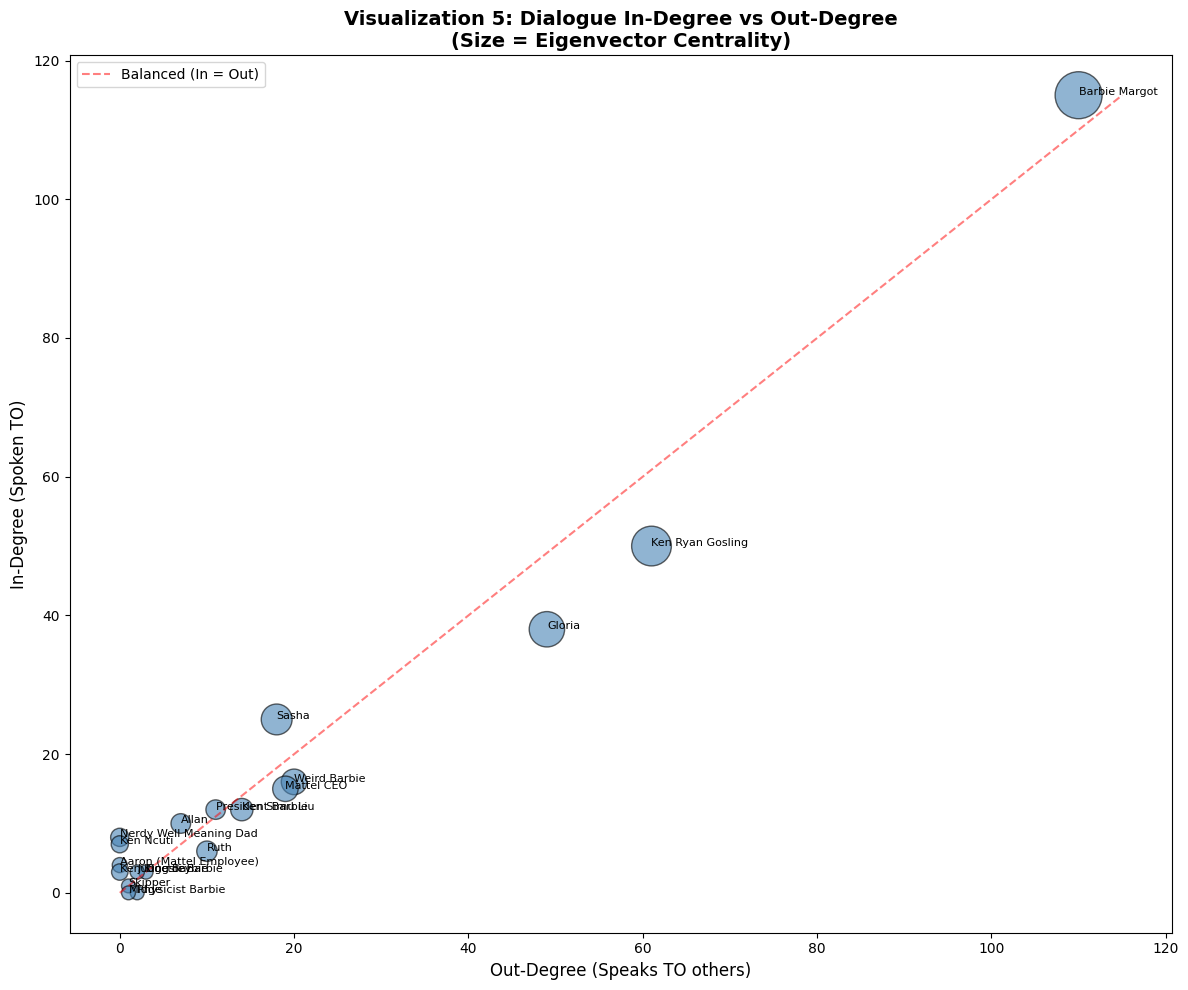

In [ ]:
plt.figure(figsize=(12, 10))

# Scatter
plt.scatter(dialogue_df['Out-Degree'], dialogue_df['In-Degree'],
            s=dialogue_df['Eigenvector']*1500 + 100, alpha=0.6, c='steelblue', edgecolors='black')

# Labels
for _, row in dialogue_df.iterrows():
    plt.annotate(row['Character'], (row['Out-Degree'], row['In-Degree']), fontsize=8, ha='left')

# Diagonal
max_val = max(dialogue_df['In-Degree'].max(), dialogue_df['Out-Degree'].max())
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Balanced (In = Out)')

plt.xlabel('Out-Degree (Speaks TO others)', fontsize=12)
plt.ylabel('In-Degree (Spoken TO)', fontsize=12)
plt.title('Visualization 5: Dialogue In-Degree vs Out-Degree\n(Size = Eigenvector Centrality)', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation of Visualization 5

Characters ABOVE the diagonal receive more than they give (attention objects). Characters BELOW speak more than they're spoken to (status seekers). $\text{Ken Ryan Gosling}$ below the line = structural evidence of unreciprocated desire.

---
📊 **ANALYSIS QUESTION 10: Scatter Plot Analysis**

Who is above the diagonal (spoken to > speaks)? Who is below (speaks > spoken to)? What does this reveal about power dynamics or narrative roles?

---
# Session 3: Comprehensive Comparison

In [ ]:
# Merge tables
full_df = pd.merge(co_presence_df, dialogue_df, on='Character', how='outer').fillna(0)
full_df = full_df.sort_values('Strength', ascending=False)

print("=" * 80)
print("COMPREHENSIVE CENTRALITY COMPARISON")
print("=" * 80)
print(full_df.to_string(index=False))

COMPREHENSIVE CENTRALITY COMPARISON
              Character  Strength  Betweenness  Closeness  Eigenvector_x  In-Degree  Out-Degree  Eigenvector_y  In/Out Ratio
          Barbie Margot        78        0.399      0.618          0.580    115.000     110.000          0.697         1.045
       Ken Ryan Gosling        68        0.352      0.600          0.517     50.000      61.000          0.479         0.820
                 Gloria        35        0.068      0.488          0.317     38.000      49.000          0.366         0.776
           Ken Simu Liu        30        0.195      0.467          0.257     12.000      14.000          0.107         0.857
       President Barbie        27        0.121      0.477          0.196     12.000      11.000          0.065         1.091
                  Sasha        26        0.033      0.447          0.275     25.000      18.000          0.262         1.389
             Mattel CEO        22        0.186      0.477          0.179     15.000      

### Structural Role Patterns

**Silent Witness:** High Co-Presence, Low Dialogue → $\text{President Barbie}$ is present but speaks little.

**Status Seeker:** Out-Degree >> In-Degree → $\text{Ken Ryan Gosling}$ initiates more than he receives.

**Structural Catalyst:** High in Strength, Betweenness, AND Dialogue → $\text{Gloria}$ and $\text{Weird Barbie}$ are essential bridges.

---
# Final Synthesis: Three Arguments

📊 **ARGUMENT 1: Network Topology**

Make a claim about your network's overall structure (e.g., "two-protagonist network," "hub-and-spoke," "fragmented communities"). Support with: (a) specific visualization, (b) quantitative metrics, (c) narrative interpretation.

---

📊 **ARGUMENT 2: Metric Divergence**

Identify a character whose metrics diverge (high in X, low in Y). Explain what this reveals about their narrative function using both visual and quantitative evidence.

---

📊 **ARGUMENT 3: Dialogue Asymmetry**

Find a relationship where dialogue is asymmetric (A speaks to B more than B speaks to A). What does this reveal about power, desire, or narrative tension?

---
# Final Synthesis: The Structural Story of *Barbie*

**1. The Two-Protagonist Network:** High Co-Presence Strength for $\text{Barbie Margot}$ and $\text{Ken Ryan Gosling}$ confirms the screenplay's structural commitment to dual protagonists. But Dialogue metrics reveal the emotional gap: Ken's high Out-Degree and lower In-Degree is the structural evidence for his unreciprocated desire.

**2. Authority vs. Attention:** Silent Witnesses like $\text{President Barbie}$ have high Co-Presence but low Dialogue—they observe rather than drive. Conversely, $\text{Ruth}$'s high Eigenvector despite low Strength shows the final message comes from concentrated authority, not popularity.

**3. Change Requires Bridges:** High Betweenness for $\text{Weird Barbie}$ and $\text{Gloria}$ proves the film's major plot transition—from Barbieland to Real World—depends on these bridge figures who possess unique links between otherwise isolated communities.